# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [ ]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [ ]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [ ]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


### (3) 데이터분할

In [ ]:

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

3

In [ ]:

# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 1, activation= 'sigmoid')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')

history = model.fit(x_train, y_train,
                    epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.6514 - val_loss: 0.6282
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6454 - val_loss: 0.6116
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6172 - val_loss: 0.5982
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6057 - val_loss: 0.5861
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5874 - val_loss: 0.5757
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5895 - val_loss: 0.5663
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5795 - val_loss: 0.5574
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5688 - val_loss: 0.5500
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5479 - val_loss: 0.5425
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5563 - val_loss: 0.5371
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5692 - val_loss: 0.5324
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5411 -

* 학습결과 그래프

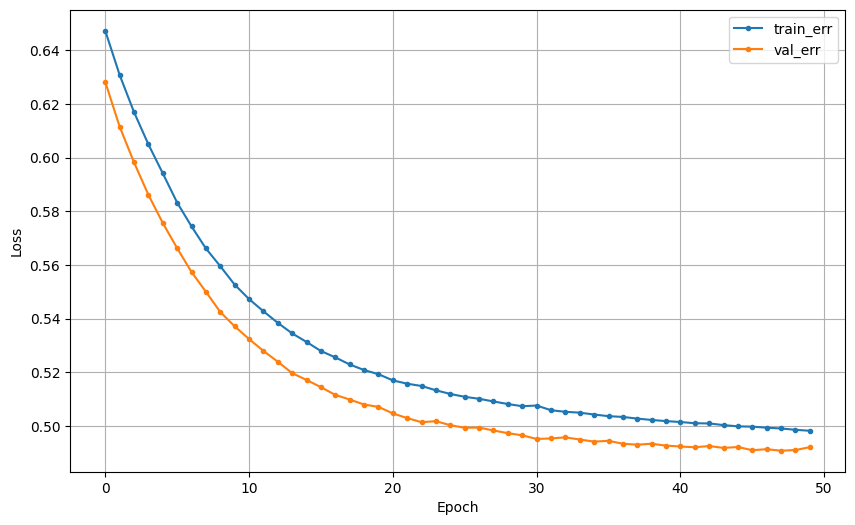

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)
print(pred[:5])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[0.71365565]
 [0.18112507]
 [0.22615539]
 [0.20221548]
 [0.728778  ]]


In [ ]:
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)
print(pred[:5])

[[1]
 [0]
 [0]
 [0]
 [1]]


In [ ]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       170
           1       0.73      0.68      0.71        98

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [ ]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [ ]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
n = x_train.shape[1]
n

8

In [ ]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential( [Input(shape = (n,)),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

* compile + 학습

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy')
history = model.fit(x_train, y_train, epochs = 50, validation_split=.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.6573 - val_loss: 0.6151
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.6142 - val_loss: 0.5976
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.6078 - val_loss: 0.5826
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.6211 - val_loss: 0.5693
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5960 - val_loss: 0.5564
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.5434 - val_loss: 0.5448
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.5718 - val_loss: 0.5357
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.5486 - val_loss: 0.5264
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5493 - val_loss: 0.5186
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5169 - val_loss: 0.5113
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5193 - val_loss: 0.5050
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5

* 학습결과 그래프

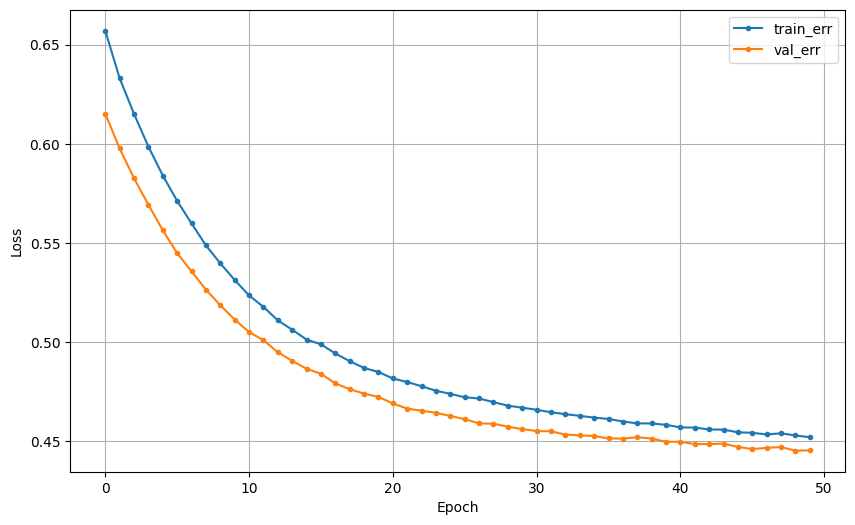

In [ ]:
dl_history_plot(history)

* 예측 및 검증

In [ ]:
pred2 = model.predict(x_val)
pred2 = np.where( pred2 >= .5 , 1, 0)
print(classification_report(y_val, pred2))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       170
           1       0.67      0.62      0.65        98

    accuracy                           0.75       268
   macro avg       0.73      0.72      0.73       268
weighted avg       0.75      0.75      0.75       268



----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [ ]:
n = x_train.shape[1]
n

8

In [ ]:
# 메모리 정리
clear_session()

# Sequential 모델
model3 = Sequential([Input(shape = (n,)),
                     Dense( 4, activation = 'relu'),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [ ]:
model3.compile( optimizer=Adam(learning_rate= 0.01), loss ='binary_crossentropy')
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=.2 ).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.6825 - val_loss: 0.6186
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6151 - val_loss: 0.5806
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5981 - val_loss: 0.5511
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5320 - val_loss: 0.5260
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5469 - val_loss: 0.5061
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5091 - val_loss: 0.4878
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4754 - val_loss: 0.4746
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4815 - val_loss: 0.4660
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4751 - val_loss: 0.4625
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4628 - val_loss: 0.4603
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4684 - val_loss: 0.4587
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4440 - val_

* 학습결과 그래프

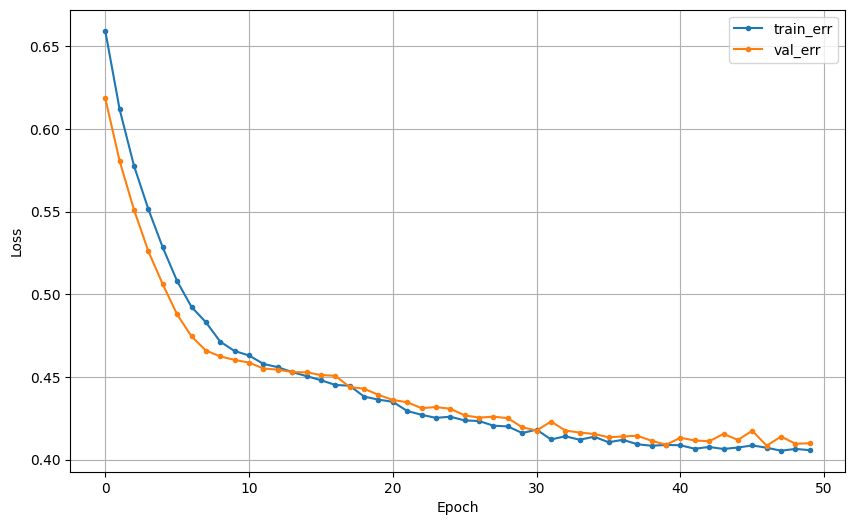

In [ ]:
dl_history_plot(hist)

* 예측 및 검증

In [ ]:
pred3 = model3.predict(x_val)
pred3 = np.where(pred3 >= 0.5, 1, 0)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       170
           1       0.76      0.59      0.67        98

    accuracy                           0.78       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.78      0.78       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [ ]:
clear_session()
model4 = Sequential([Input(shape = (n,)),
                     Dense(16, activation = 'relu'),
                     Dense(1, activation = 'sigmoid')])
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model4.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy')
hist4 = model4.fit(x_train, y_train, epochs = 50, validation_split= .2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.6235 - val_loss: 0.5398
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5324 - val_loss: 0.4899
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4777 - val_loss: 0.4605
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4872 - val_loss: 0.4461
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4576 - val_loss: 0.4368
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4283 - val_loss: 0.4286
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4556 - val_loss: 0.4212
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4320 - val_loss: 0.4166
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4224 - val_loss: 0.4151
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4227 - val_loss: 0.4056
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4032 - val_loss: 0.4062
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3984 - v

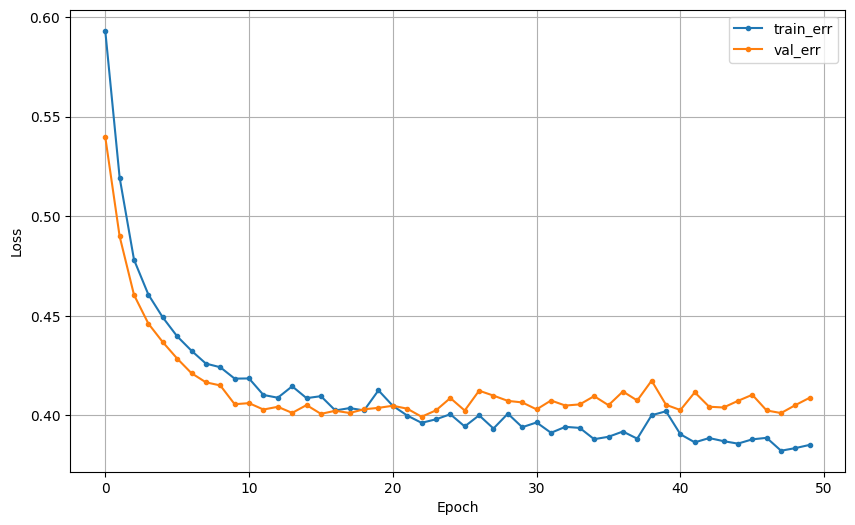

In [ ]:
dl_history_plot(hist4)

In [ ]:
pred4 = model4.predict(x_val)
pred4 = np.where(pred4 >= 0.5, 1, 0)
print(classification_report(y_val, pred4))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.78      0.89      0.84       170
           1       0.76      0.57      0.65        98

    accuracy                           0.78       268
   macro avg       0.77      0.73      0.74       268
weighted avg       0.77      0.78      0.77       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

In [ ]:
clear_session()
model5 = Sequential([Input(shape=(n,)),
                     Dense(16, activation ='relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1, activation = 'sigmoid')])
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model5.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy')
hist5 = model5.fit(x_train, y_train, epochs = 50, validation_split = .2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.6188 - val_loss: 0.5202
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5360 - val_loss: 0.4671
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4767 - val_loss: 0.4728
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4187 - val_loss: 0.4462
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4306 - val_loss: 0.4340
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4391 - val_loss: 0.4162
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4051 - val_loss: 0.4286
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4121 - val_loss: 0.4107
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4186 - val_loss: 0.4184
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4244 - val_loss: 0.4213
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3922 - val_loss: 0.4127
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4315 - val_l

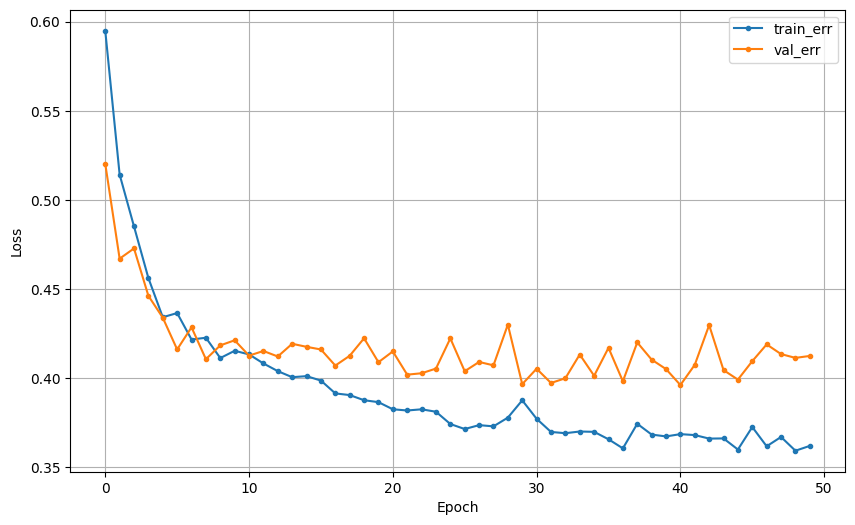

In [ ]:
dl_history_plot(hist5)

In [ ]:
pred5 = model5.predict(x_val)
pred5 = np.where(pred5 >= 0.5, 1, 0)
print(classification_report(y_val,pred5))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       170
           1       0.77      0.60      0.67        98

    accuracy                           0.79       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.79      0.78       268



### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


In [ ]:
clear_session()

model6 = Sequential([Input(shape = (n,)),
                     Dense(8, activation = 'relu'),
                     Dense(4, activation = 'relu'),
                     Dense(1, activation = 'sigmoid')])

model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model6.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy')
hist6 = model6.fit(x_train, y_train, epochs =50, validation_split =.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6826 - val_loss: 0.5965
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5822 - val_loss: 0.4947
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4975 - val_loss: 0.4354
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4517 - val_loss: 0.4212
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4104 - val_loss: 0.4181
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4292 - val_loss: 0.4081
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3712 - val_loss: 0.4064
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4249 - val_loss: 0.4081
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3948 - val_loss: 0.4050
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4474 - val_loss: 0.4038
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4039 - val_loss: 0.4018
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4387 - val_l

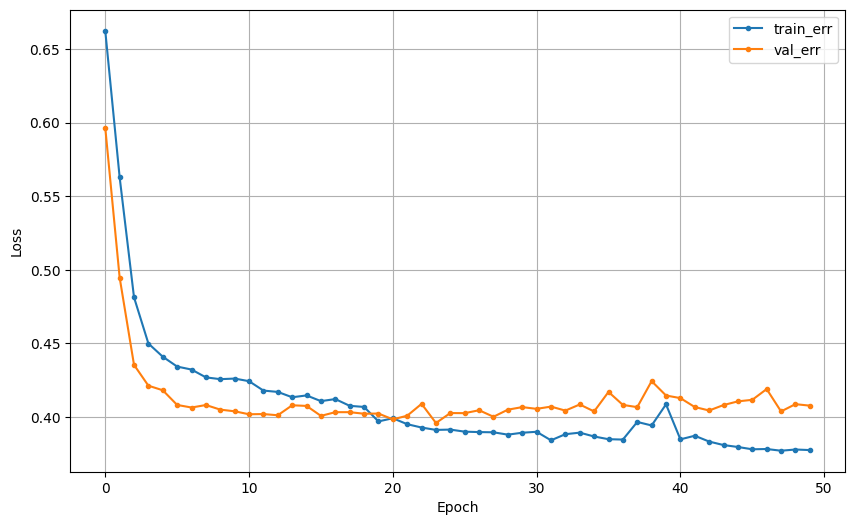

In [ ]:
dl_history_plot(hist6)

In [ ]:

pred6 = model6.predict(x_val)
pred6 = np.where(pred6 >= 0.5 , 1 , 0)
print(classification_report(y_val, pred6))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       170
           1       0.72      0.59      0.65        98

    accuracy                           0.77       268
   macro avg       0.76      0.73      0.74       268
weighted avg       0.76      0.77      0.76       268

